In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored

In [ ]:
df = pd.read_json("drive/MyDrive/NLP/Digital_Music.json", lines=True)

In [ ]:
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"12 22, 2013",A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,1387670400,NaN,NaN
1,5,True,"09 11, 2013",AC2PL52NKPL29,0001388703,{'Format:': ' Audio CD'},Norma Mushen,"So creative! Love his music - the words, the ...",Gotta listen to this!,1378857600,NaN,NaN
2,5,True,"03 2, 2013",A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,1362182400,NaN,NaN
3,5,True,"12 2, 2012",A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,1354406400,NaN,NaN
4,5,False,"01 7, 2012",A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,NaN


In [ ]:
df.shape

(1582629, 12)

In [ ]:
df.iloc[0]['reviewText']

'This is a great cd full of worship favorites!!  All time great Keith green songs. His best album by far.'

In [ ]:
#number of unique products
df['asin'].nunique()

456992

In [ ]:
# Mean length of reviews in characters
df['reviewText'].str.len().mean()

213.10512002497111

In [ ]:
#max length
df['reviewText'].str.len().max()

32501.0

In [ ]:
type(df.reviewText)

pandas.core.series.Series

In [ ]:
len(df.iloc[0]['reviewText'])

104

In [ ]:
type(df.style)

pandas.io.formats.style.Styler

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.groupby('style').size()
#Je ne sais pas pourquoi je n'arrive pas à groupby ici

TypeError: ignored

In [ ]:
df['style'].drop_duplicates().tolist()
#Peut-être intéressant de comparer selon le type de support de musique, mais je n'arrive pas à faire de stats desc sur style car le format est bizarre

[{'Format:': ' Audio CD'},
 {'Format:': ' MP3 Music'},
 {'Format:': ' Audio Cassette'},
 nan,
 {'Format:': ' Paperback'},
 {'Format:': ' DVD'},
 {'Format:': ' VHS Tape'},
 {'Format:': ' Vinyl'},
 {'Format:': ' Blu-ray'},
 {'Format:': ' DVD Audio'},
 {'Format:': ' Vinyl Bound'},
 {'Format:': ' Amazon Video'},
 {'Format:': ' USB Memory Stick'},
 {'Format:': ' Blu-ray Audio'},
 {'Format:': ' Hardcover'},
 {'Format:': ' Spiral-bound'},
 {'Format:': ' DVD-ROM'},
 {'Format:': ' Audible Audiobook'},
 {'Format:': ' Kindle Edition'},
 {'Format:': ' Laser Disc'},
 {'Format:': ' CD-ROM'},
 {'Format:': ' Health and Beauty'},
 {'Color:': ' Black'},
 {'Format:': ' Home'},
 {'Format:': ' Personal Computers'},
 {'Format:': ' Unknown Binding'},
 {'Format:': ' Perfect Paperback'},
 {'Format:': ' Unbound'},
 {'Format:': ' Accessory'},
 {'Format:': ' Grocery'},
 {'Format:': ' Apparel'},
 {'Format:': ' Kitchen'},
 {'Format:': ' Office Product'},
 {'Format:': ' CD Video'},
 {'Color:': ' Multicolor', 'Size:'

(0.0, 1000.0)

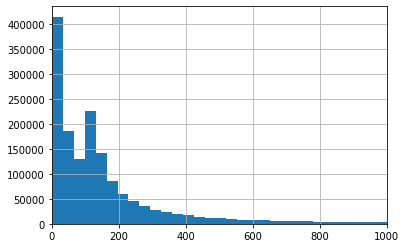

In [ ]:
%matplotlib inline
df['reviewText'].dropna().apply(len).hist(bins=1000).set_xlim((0,1000))

In [ ]:
df['overall'].describe()

count    1.584082e+06
mean     4.660555e+00
std      8.440314e-01
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [ ]:
df.groupby(df.overall).size()

overall
1      43108
2      23551
3      57347
4     179929
5    1280147
dtype: int64

In [ ]:
df.groupby(df.overall).size()*100/df.groupby(df.overall).size().sum()

overall
1     2.721324
2     1.486729
3     3.620204
4    11.358566
5    80.813178
dtype: float64

We can see that more than 90% of the products have good rates, which can make difficult the prediction of bad rates.

In [ ]:
df = df.dropna(subset=['reviewText'])

In [ ]:
arr = df.reviewText.drop_duplicates().apply(lambda x: x.split(' ')).array
arr = [ x for X in arr for x in X]
print(arr[:5])
print('%s "words" in the contents' % (len(set(arr))))

['This', 'is', 'a', 'great', 'cd']
1662499 "words" in the contents


In [ ]:
from nltk.tokenize import TreebankWordTokenizer
from tqdm.notebook import tqdm

tokenizer = [TreebankWordTokenizer()]
import pdb

for tok in tqdm(tokenizer):
  print('Using tokenizer: %s' % (tok))
  arr = df.reviewText.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # the set object transforms a list to the set of unique elements in the list :
  print('The 30 first tokens: %s' % (arr[:30]) )
  print("Vocabulary size: {0} with {1} tokenizer".format(len(set(arr)), tok))

  0%|          | 0/1 [00:00<?, ?it/s]

Using tokenizer: <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fa83d54c110>
The 30 first tokens: ['This', 'is', 'a', 'great', 'cd', 'full', 'of', 'worship', 'favorites', '!', '!', 'All', 'time', 'great', 'Keith', 'green', 'songs.', 'His', 'best', 'album', 'by', 'far', '.', 'So', 'creative', '!', 'Love', 'his', 'music', '-']
Vocabulary size: 685413 with <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fa83d54c110> tokenizer


In [ ]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
from tqdm.notebook import tqdm

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
import pdb # python debugger
for tok in tqdm(tokenizers):
  print('Using tokenizer: %s' % (tok))
  arr = df.reviewText.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # the set object transforms a list to the set of unique elements in the list :
  print('The 30 first tokens: %s' % (arr[:30]) )
  print("Vocabulary size: {0} with {1} tokenizer".format(len(set(arr)), tok))
  print('='*5)  

  0%|          | 0/3 [00:00<?, ?it/s]

Using tokenizer: <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fa8a7139110>
The 30 first tokens: ['This', 'is', 'a', 'great', 'cd', 'full', 'of', 'worship', 'favorites', '!', '!', 'All', 'time', 'great', 'Keith', 'green', 'songs.', 'His', 'best', 'album', 'by', 'far', '.', 'So', 'creative', '!', 'Love', 'his', 'music', '-']
Vocabulary size: 685413 with <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fa8a7139110> tokenizer
=====
Using tokenizer: <nltk.tokenize.toktok.ToktokTokenizer object at 0x7fa8a7139d90>
The 30 first tokens: ['This', 'is', 'a', 'great', 'cd', 'full', 'of', 'worship', 'favorites', '!', '!', 'All', 'time', 'great', 'Keith', 'green', 'songs.', 'His', 'best', 'album', 'by', 'far', '.', 'So', 'creative', '!', 'Love', 'his', 'music', '-']
Vocabulary size: 660675 with <nltk.tokenize.toktok.ToktokTokenizer object at 0x7fa8a7139d90> tokenizer
=====
Using tokenizer: <nltk.tokenize.casual.TweetTokenizer object at 0x7fa8a7139410>
The 30 first tokens: ['T

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

for summary in df.summary[:20]:
  doc = nlp(summary)
  displacy.render(doc, style="ent",jupyter=True)

/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
